<a href="https://colab.research.google.com/github/neurobit-ai/eyeForm/blob/main/data_to_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 讀eyeForm.db.xlsx

In [1]:
from google.colab import files
assert files.upload()

Saving eyeForm.db.xlsx to eyeForm.db.xlsx


# 軸長危險度分析data

In [2]:
import pandas as pd
sheet = pd.read_excel('eyeForm.db.xlsx', sheet_name='三總', header=2)
db_version = f"v{sheet.iloc[-1]['時間戳記']}".split()[0].replace('-', '')
df = sheet[['性別', '實歲', '右眼軸長', '左眼軸長', '眼鏡', '散瞳劑', '角膜塑型片']].dropna(subset=['性別', '實歲', '右眼軸長', '左眼軸長'])
df

,性別,實歲,右眼軸長,左眼軸長,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,25.46,25.13,NaN,0.0005,NaN
1,男,7歲2月,25.48,25.2,NaN,NaN,NaN
2,男,7歲4月,25.56,25.26,NaN,NaN,NaN
3,女,7歲7月,23.66,23.5,NaN,0.0003,NaN
5,女,8歲3月,24,23.77,NaN,0.0005,NaN
...,...,...,...,...,...,...,...
4341,女,6歲5個月,20.89,20.81,NaN,0.0010,NaN
4342,男,8歲6個月,24.07,24.18,NaN,NaN,NaN
4343,女,6歲1個月,22.04,22.26,NaN,NaN,NaN
4344,女,6歲7個月,22.24,22.48,NaN,NaN,NaN


In [3]:
od = df.drop(columns='左眼軸長')
os = df.drop(columns='右眼軸長')
od.columns = ['性別', '實歲', '軸長', '眼鏡', '散瞳劑', '角膜塑型片']
os.columns = ['性別', '實歲', '軸長', '眼鏡', '散瞳劑', '角膜塑型片']
data = pd.concat([od, os])
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,25.46,NaN,0.0005,NaN
1,男,7歲2月,25.48,NaN,NaN,NaN
2,男,7歲4月,25.56,NaN,NaN,NaN
3,女,7歲7月,23.66,NaN,0.0003,NaN
5,女,8歲3月,24,NaN,0.0005,NaN
...,...,...,...,...,...,...
4341,女,6歲5個月,20.81,NaN,0.0010,NaN
4342,男,8歲6個月,24.18,NaN,NaN,NaN
4343,女,6歲1個月,22.26,NaN,NaN,NaN
4344,女,6歲7個月,22.48,NaN,NaN,NaN


In [4]:
data = data.drop(data[data['軸長'] == '< 20'].index)
data = data.drop(data[data['軸長'] == '> 30'].index)
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,25.46,NaN,0.0005,NaN
1,男,7歲2月,25.48,NaN,NaN,NaN
2,男,7歲4月,25.56,NaN,NaN,NaN
3,女,7歲7月,23.66,NaN,0.0003,NaN
5,女,8歲3月,24,NaN,0.0005,NaN
...,...,...,...,...,...,...
4341,女,6歲5個月,20.81,NaN,0.0010,NaN
4342,男,8歲6個月,24.18,NaN,NaN,NaN
4343,女,6歲1個月,22.26,NaN,NaN,NaN
4344,女,6歲7個月,22.48,NaN,NaN,NaN


In [5]:
age = data['實歲'].str.extract('(\d+)歲(\d+)')
age

,0,1
0,6,11
1,7,2
2,7,4
3,7,7
5,8,3
...,...,...
4341,6,5
4342,8,6
4343,6,1
4344,6,7


In [6]:
data['實歲'] = age[0].astype(int) + age[1].astype(int) / 12
data['年歲'] = age[0].astype(int) + (age[1].astype(int) >= 6).astype(int) # round() could be wrong
data['軸長'] = data['軸長'].astype(float)
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片,年歲
0,男,6.916667,25.46,NaN,0.0005,NaN,7
1,男,7.166667,25.48,NaN,NaN,NaN,7
2,男,7.333333,25.56,NaN,NaN,NaN,7
3,女,7.583333,23.66,NaN,0.0003,NaN,8
5,女,8.250000,24.00,NaN,0.0005,NaN,8
...,...,...,...,...,...,...,...
4341,女,6.416667,20.81,NaN,0.0010,NaN,6
4342,男,8.500000,24.18,NaN,NaN,NaN,9
4343,女,6.083333,22.26,NaN,NaN,NaN,6
4344,女,6.583333,22.48,NaN,NaN,NaN,7


In [7]:
data.loc[data['散瞳劑'] > 0, '散瞳劑'] = '散瞳劑'
data['治療處置分類'] = data['眼鏡'].fillna('') + data['散瞳劑'].fillna('') + data['角膜塑型片'].fillna('')
data['治療處置分類'] = data['治療處置分類'].replace({'': '不處置'})
data['治療處置分類'].value_counts()

不處置          1994
散瞳劑           868
一般眼鏡          610
一般眼鏡散瞳劑       460
角膜塑型片         154
散瞳劑角膜塑型片       16
一般眼鏡角膜塑型片       6
Name: 治療處置分類, dtype: int64

In [8]:
import numpy as np
def percentile(q):
    # def function(a):
    #     return np.percentile(a, q)
    function = lambda a: np.percentile(a, q)
    function.__name__ = f'P{q}'
    return function

In [9]:
quartile = data.groupby(['性別', '年歲'])['軸長'].aggregate([percentile(25), percentile(75)])
IQR = quartile['P75'] - quartile['P25']
lower_fence = quartile['P25'] - IQR * 1.5
upper_fence = quartile['P75'] + IQR * 1.5

In [10]:
for i in quartile.index:
    data.loc[(data['性別'] == i[0]) & (data['年歲'] == i[1]), 'lower_fence'] = lower_fence[i]
    data.loc[(data['性別'] == i[0]) & (data['年歲'] == i[1]), 'upper_fence'] = upper_fence[i]
data

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片,年歲,治療處置分類,lower_fence,upper_fence
0,男,6.916667,25.46,NaN,散瞳劑,NaN,7,散瞳劑,20.55125,26.20125
1,男,7.166667,25.48,NaN,NaN,NaN,7,不處置,20.55125,26.20125
2,男,7.333333,25.56,NaN,NaN,NaN,7,不處置,20.55125,26.20125
3,女,7.583333,23.66,NaN,散瞳劑,NaN,8,散瞳劑,21.33250,25.61250
5,女,8.250000,24.00,NaN,散瞳劑,NaN,8,散瞳劑,21.33250,25.61250
...,...,...,...,...,...,...,...,...,...,...
4341,女,6.416667,20.81,NaN,散瞳劑,NaN,6,散瞳劑,19.27250,25.17250
4342,男,8.500000,24.18,NaN,NaN,NaN,9,不處置,22.29875,26.06875
4343,女,6.083333,22.26,NaN,NaN,NaN,6,不處置,19.27250,25.17250
4344,女,6.583333,22.48,NaN,NaN,NaN,7,不處置,20.85875,24.96875


In [11]:
data_without_outliers = data[(data['軸長'] > data['lower_fence']) & (data['軸長'] < data['upper_fence'])]
data_without_outliers

,性別,實歲,軸長,眼鏡,散瞳劑,角膜塑型片,年歲,治療處置分類,lower_fence,upper_fence
0,男,6.916667,25.46,NaN,散瞳劑,NaN,7,散瞳劑,20.55125,26.20125
1,男,7.166667,25.48,NaN,NaN,NaN,7,不處置,20.55125,26.20125
2,男,7.333333,25.56,NaN,NaN,NaN,7,不處置,20.55125,26.20125
3,女,7.583333,23.66,NaN,散瞳劑,NaN,8,散瞳劑,21.33250,25.61250
5,女,8.250000,24.00,NaN,散瞳劑,NaN,8,散瞳劑,21.33250,25.61250
...,...,...,...,...,...,...,...,...,...,...
4341,女,6.416667,20.81,NaN,散瞳劑,NaN,6,散瞳劑,19.27250,25.17250
4342,男,8.500000,24.18,NaN,NaN,NaN,9,不處置,22.29875,26.06875
4343,女,6.083333,22.26,NaN,NaN,NaN,6,不處置,19.27250,25.17250
4344,女,6.583333,22.48,NaN,NaN,NaN,7,不處置,20.85875,24.96875


In [12]:
from sklearn.linear_model import LinearRegression
slope_groupby = data_without_outliers.groupby(['性別', '治療處置分類']).apply(lambda group: LinearRegression().fit(group['實歲'].to_numpy().reshape(-1, 1), group['軸長'].to_numpy().reshape(-1, 1)).coef_[0][0])
slope_groupby

性別  治療處置分類   
女   一般眼鏡         0.350750
    一般眼鏡散瞳劑      0.216851
    一般眼鏡角膜塑型片    1.830000
    不處置          0.262043
    散瞳劑          0.157267
    散瞳劑角膜塑型片     0.000000
    角膜塑型片        0.053746
男   一般眼鏡         0.329154
    一般眼鏡散瞳劑      0.189347
    一般眼鏡角膜塑型片    0.000000
    不處置          0.258378
    散瞳劑          0.109909
    散瞳劑角膜塑型片    -0.077909
    角膜塑型片        0.060966
dtype: float64

In [13]:
stacked_area = data_without_outliers.groupby(['性別', '年歲'])['軸長'].aggregate([percentile(0), percentile(50), percentile(75), percentile(90), percentile(100)])
stacked_area

P0     P50      P75     P90   P100
性別 年歲                                       
女  0   20.50  20.520  20.5300  20.536  20.54
   1   20.55  20.690  20.7450  20.765  20.77
   2   20.86  20.905  20.9700  21.024  21.06
   3   20.26  21.310  21.7850  22.194  23.06
   4   20.35  21.720  22.0200  22.789  23.33
   5   19.73  22.130  22.6175  23.015  24.50
   6   19.64  22.105  22.9225  23.314  24.57
   7   20.86  22.955  23.4125  24.000  24.84
   8   21.35  23.460  23.9100  24.590  25.54
   9   21.51  23.690  24.0800  24.584  25.57
   10  21.81  23.840  24.5100  25.010  25.89
   11  21.63  24.040  24.7100  25.076  25.90
   12  22.51  24.330  24.6700  25.030  25.33
   13  22.81  24.380  24.9400  25.530  26.66
   14  22.92  24.840  25.5900  25.890  26.20
   15  22.39  24.980  25.3975  26.062  26.44
   16  23.29  24.560  25.1100  25.800  26.54
   17  23.63  25.290  25.5900  25.872  26.01
   18  22.42  23.700  25.1400  25.806  26.25
   21  24.69  24.915  25.0275  25.095  25.14
男  2   21.88  22.060  22.0800  22.296  22.44
   3   20.99  22.610  23.2450  23.825  24.29
   4   20.37  22.170  22.7000  23.134  24.14
   5   20.48  22.650  23.3225  23.935  25.10
   6   20.13  22.780  23.7150  24.332  25.53
   7   21.10  23.460  24.0875  24.599  26.14
   8   21.45  23.960  24.4300  24.982  25.76
   9   22.45  24.250  24.6400  24.994  25.93
   10  21.99  24.390  25.1000  25.490  26.28
   11  22.36  24.435  25.0475  25.750  26.77
   12  23.02  24.650  25.1450  25.826  26.93
   13  23.08  24.840  25.1600  25.603  26.63
   14  23.21  24.820  25.1000  25.832  26.56
   15  22.83  24.735  25.2450  26.839  27.28
   16  22.40  25.410  26.6525  27.197  27.86
   17  26.55  27.010  27.4675  27.715  27.88
   18  25.46  25.695  25.8125  25.883  25.93

In [14]:
import matplotlib.pyplot as plt
def plot(sex):
    area = stacked_area.loc[sex].loc[3:16]
    MorF = {'男': 'Male', '女': 'Female'}[sex]
    plt.fill_between(area.index, area['P100'], area['P90'], color='red', alpha=0.6, label='90~100%')
    plt.fill_between(area.index, area['P90'], area['P75'], color='orange', alpha=0.6, label='75~90%')
    plt.fill_between(area.index, area['P75'], area['P50'], color='yellow', alpha=0.6, label='50~75%')
    plt.fill_between(area.index, area['P50'], area['P0'], color='lightgreen', alpha=0.6, label='0~50%')
    plt.title(f'Trend of {MorF} Children in Taiwan', fontsize=12)
    plt.legend(loc='lower right')
    plt.xticks(range(3, 17))
    plt.yticks(range(20, 30))
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Axial Length', fontsize=12)
    plt.margins(0)
    plt.text(16, 18.5, f'{db_version}', horizontalalignment='right', fontsize=8)

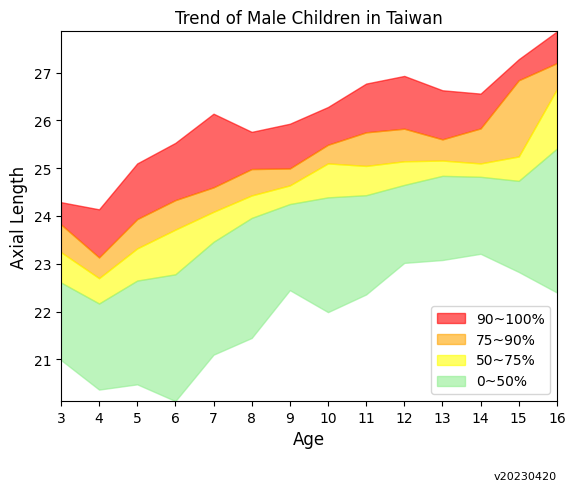

In [15]:
plot('男')

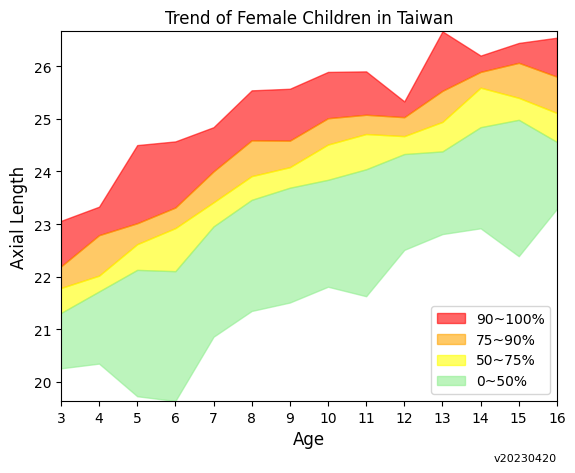

In [16]:
plot('女')

In [17]:
data_to_plot = dict()
data_to_plot['軸長'] = [db_version, slope_groupby.copy(), stacked_area.copy()]
del slope_groupby, stacked_area

# 球面度數危險度分析data

In [18]:
import pandas as pd
sheet = pd.read_excel('eyeForm.db.xlsx', sheet_name='三總', header=2)
db_version = f"v{sheet.iloc[-1]['時間戳記']}".split()[0].replace('-', '')
df = sheet[['性別', '實歲', '右眼球面度數', '左眼球面度數', '眼鏡', '散瞳劑', '角膜塑型片']].dropna(subset=['性別', '實歲', '右眼球面度數', '左眼球面度數'])
df

,性別,實歲,右眼球面度數,左眼球面度數,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,-1.5,-1.50,NaN,0.0005,NaN
1,男,7歲2月,-1.5,-1.50,NaN,NaN,NaN
2,男,7歲4月,-1.5,-2.00,NaN,NaN,NaN
3,女,7歲7月,-1,-1.00,NaN,0.0003,NaN
4,女,7歲8月,-1.5,-1.50,一般眼鏡,0.0003,NaN
...,...,...,...,...,...,...,...
4339,男,6歲7個月,0.5,1.00,NaN,NaN,NaN
4341,女,6歲5個月,0.5,1.25,NaN,0.0010,NaN
4343,女,6歲1個月,1,0.50,NaN,NaN,NaN
4344,女,6歲7個月,0,-0.75,NaN,NaN,NaN


In [19]:
od = df.drop(columns='左眼球面度數')
os = df.drop(columns='右眼球面度數')
od.columns = ['性別', '實歲', '球面度數', '眼鏡', '散瞳劑', '角膜塑型片']
os.columns = ['性別', '實歲', '球面度數', '眼鏡', '散瞳劑', '角膜塑型片']
data = pd.concat([od, os])
data

,性別,實歲,球面度數,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,-1.5,NaN,0.0005,NaN
1,男,7歲2月,-1.5,NaN,NaN,NaN
2,男,7歲4月,-1.5,NaN,NaN,NaN
3,女,7歲7月,-1,NaN,0.0003,NaN
4,女,7歲8月,-1.5,一般眼鏡,0.0003,NaN
...,...,...,...,...,...,...
4339,男,6歲7個月,1.0,NaN,NaN,NaN
4341,女,6歲5個月,1.25,NaN,0.0010,NaN
4343,女,6歲1個月,0.5,NaN,NaN,NaN
4344,女,6歲7個月,-0.75,NaN,NaN,NaN


In [20]:
data = data.drop(data[data['球面度數'] == '< 20'].index)
data = data.drop(data[data['球面度數'] == '> 30'].index)
data

,性別,實歲,球面度數,眼鏡,散瞳劑,角膜塑型片
0,男,6歲11月,-1.5,NaN,0.0005,NaN
1,男,7歲2月,-1.5,NaN,NaN,NaN
2,男,7歲4月,-1.5,NaN,NaN,NaN
3,女,7歲7月,-1,NaN,0.0003,NaN
4,女,7歲8月,-1.5,一般眼鏡,0.0003,NaN
...,...,...,...,...,...,...
4339,男,6歲7個月,1.0,NaN,NaN,NaN
4341,女,6歲5個月,1.25,NaN,0.0010,NaN
4343,女,6歲1個月,0.5,NaN,NaN,NaN
4344,女,6歲7個月,-0.75,NaN,NaN,NaN


In [21]:
age = data['實歲'].str.extract('(\d+)歲(\d+)')
age

,0,1
0,6,11
1,7,2
2,7,4
3,7,7
4,7,8
...,...,...
4339,6,7
4341,6,5
4343,6,1
4344,6,7


In [22]:
data['實歲'] = age[0].astype(int) + age[1].astype(int) / 12
data['年歲'] = age[0].astype(int) + (age[1].astype(int) >= 6).astype(int) # round() could be wrong
data['球面度數'] = data['球面度數'].astype(float)
data

,性別,實歲,球面度數,眼鏡,散瞳劑,角膜塑型片,年歲
0,男,6.916667,-1.50,NaN,0.0005,NaN,7
1,男,7.166667,-1.50,NaN,NaN,NaN,7
2,男,7.333333,-1.50,NaN,NaN,NaN,7
3,女,7.583333,-1.00,NaN,0.0003,NaN,8
4,女,7.666667,-1.50,一般眼鏡,0.0003,NaN,8
...,...,...,...,...,...,...,...
4339,男,6.583333,1.00,NaN,NaN,NaN,7
4341,女,6.416667,1.25,NaN,0.0010,NaN,6
4343,女,6.083333,0.50,NaN,NaN,NaN,6
4344,女,6.583333,-0.75,NaN,NaN,NaN,7


In [23]:
data.loc[data['散瞳劑'] > 0, '散瞳劑'] = '散瞳劑'
data['治療處置分類'] = data['眼鏡'].fillna('') + data['散瞳劑'].fillna('') + data['角膜塑型片'].fillna('')
data['治療處置分類'] = data['治療處置分類'].replace({'': '不處置'})
data['治療處置分類'].value_counts()

不處置          2336
散瞳劑          1034
一般眼鏡          792
一般眼鏡散瞳劑       516
角膜塑型片         242
散瞳劑角膜塑型片       20
一般眼鏡角膜塑型片       6
Name: 治療處置分類, dtype: int64

In [24]:
import numpy as np
def percentile(q):
    # def function(a):
    #     return np.percentile(a, q)
    function = lambda a: np.percentile(a, q)
    function.__name__ = f'P{q}'
    return function

In [25]:
quartile = data.groupby(['性別', '年歲'])['球面度數'].aggregate([percentile(25), percentile(75)])
IQR = quartile['P75'] - quartile['P25']
lower_fence = quartile['P25'] - IQR * 1.5
upper_fence = quartile['P75'] + IQR * 1.5

In [26]:
for i in quartile.index:
    data.loc[(data['性別'] == i[0]) & (data['年歲'] == i[1]), 'lower_fence'] = lower_fence[i]
    data.loc[(data['性別'] == i[0]) & (data['年歲'] == i[1]), 'upper_fence'] = upper_fence[i]
data

,性別,實歲,球面度數,眼鏡,散瞳劑,角膜塑型片,年歲,治療處置分類,lower_fence,upper_fence
0,男,6.916667,-1.50,NaN,散瞳劑,NaN,7,散瞳劑,-3.75000,2.25000
1,男,7.166667,-1.50,NaN,NaN,NaN,7,不處置,-3.75000,2.25000
2,男,7.333333,-1.50,NaN,NaN,NaN,7,不處置,-3.75000,2.25000
3,女,7.583333,-1.00,NaN,散瞳劑,NaN,8,散瞳劑,-5.00000,3.00000
4,女,7.666667,-1.50,一般眼鏡,散瞳劑,NaN,8,一般眼鏡散瞳劑,-5.00000,3.00000
...,...,...,...,...,...,...,...,...,...,...
4339,男,6.583333,1.00,NaN,NaN,NaN,7,不處置,-3.75000,2.25000
4341,女,6.416667,1.25,NaN,散瞳劑,NaN,6,散瞳劑,-3.09375,4.65625
4343,女,6.083333,0.50,NaN,NaN,NaN,6,不處置,-3.09375,4.65625
4344,女,6.583333,-0.75,NaN,NaN,NaN,7,不處置,-3.25000,2.75000


In [27]:
data_without_outliers = data[(data['球面度數'] > data['lower_fence']) & (data['球面度數'] < data['upper_fence'])]
data_without_outliers

,性別,實歲,球面度數,眼鏡,散瞳劑,角膜塑型片,年歲,治療處置分類,lower_fence,upper_fence
0,男,6.916667,-1.50,NaN,散瞳劑,NaN,7,散瞳劑,-3.75000,2.25000
1,男,7.166667,-1.50,NaN,NaN,NaN,7,不處置,-3.75000,2.25000
2,男,7.333333,-1.50,NaN,NaN,NaN,7,不處置,-3.75000,2.25000
3,女,7.583333,-1.00,NaN,散瞳劑,NaN,8,散瞳劑,-5.00000,3.00000
4,女,7.666667,-1.50,一般眼鏡,散瞳劑,NaN,8,一般眼鏡散瞳劑,-5.00000,3.00000
...,...,...,...,...,...,...,...,...,...,...
4339,男,6.583333,1.00,NaN,NaN,NaN,7,不處置,-3.75000,2.25000
4341,女,6.416667,1.25,NaN,散瞳劑,NaN,6,散瞳劑,-3.09375,4.65625
4343,女,6.083333,0.50,NaN,NaN,NaN,6,不處置,-3.09375,4.65625
4344,女,6.583333,-0.75,NaN,NaN,NaN,7,不處置,-3.25000,2.75000


In [28]:
from sklearn.linear_model import LinearRegression
slope_groupby = data_without_outliers.groupby(['性別', '治療處置分類']).apply(lambda group: LinearRegression().fit(group['實歲'].to_numpy().reshape(-1, 1), group['球面度數'].to_numpy().reshape(-1, 1)).coef_[0][0])
slope_groupby

性別  治療處置分類   
女   一般眼鏡        -0.330001
    一般眼鏡散瞳劑     -0.282083
    一般眼鏡角膜塑型片    0.500000
    不處置         -0.269612
    散瞳劑         -0.096504
    散瞳劑角膜塑型片     0.000000
    角膜塑型片       -0.488897
男   一般眼鏡        -0.343222
    一般眼鏡散瞳劑     -0.332038
    一般眼鏡角膜塑型片    0.000000
    不處置         -0.237713
    散瞳劑         -0.248002
    散瞳劑角膜塑型片     0.297210
    角膜塑型片       -0.214276
dtype: float64

In [29]:
stacked_area = data_without_outliers.groupby(['性別', '年歲'])['球面度數'].aggregate([percentile(100), percentile(50), percentile(25), percentile(10), percentile(0)])
stacked_area

P100    P50     P25    P10    P0
性別 年歲                                  
女  0   7.00  6.250  3.7500  2.750  2.50
   1   3.00  2.000  1.0000  0.550  0.50
   2   7.00  2.000  1.2500  0.075  0.00
   3   4.50  0.250 -0.2500 -3.500 -4.25
   4   5.50  0.625  0.0000 -0.500 -3.50
   5   3.50  0.500  0.0000  0.000 -1.75
   6   4.50  0.125  0.0000 -0.750 -3.00
   7   2.50 -0.250 -1.0000 -1.825 -3.00
   8   2.75 -0.750 -2.0000 -3.225 -4.75
   9   1.75 -1.000 -1.5000 -2.500 -3.50
   10  1.25 -1.000 -2.0000 -2.750 -4.00
   11  1.00 -1.250 -2.0000 -2.500 -3.75
   12  2.25 -1.375 -2.2500 -3.250 -4.25
   13  1.00 -2.750 -3.2500 -3.875 -5.50
   14  1.25 -3.000 -3.7500 -4.250 -4.50
   15  1.50 -2.500 -4.0000 -5.000 -6.75
   16  0.75 -2.375 -4.0000 -6.500 -7.00
   17 -3.50 -3.500 -3.6250 -3.700 -3.75
   18  0.50  0.375  0.3125  0.275  0.25
   19  0.00 -1.875 -4.1875 -4.975 -5.50
   28  0.50 -0.125 -0.4375 -0.625 -0.75
男  0   3.00  2.500  2.1250  2.000  2.00
   1   5.50  3.750  1.7500  0.500  0.00
   2   5.00  2.000  1.0000  1.000  0.50
   3   2.50  0.250  0.0000 -0.450 -1.50
   4   3.50  0.750  0.0000 -0.500 -2.00
   5   2.75  0.000 -0.2500 -1.000 -2.00
   6   3.50  0.000 -0.7500 -1.500 -3.25
   7   2.00 -0.500 -1.2500 -2.000 -3.50
   8   2.00 -0.500 -1.2500 -2.000 -3.50
   9   1.50 -0.750 -1.2500 -2.000 -3.25
   10  1.50 -1.000 -2.0000 -3.000 -4.00
   11  4.00 -1.250 -3.0000 -4.150 -7.25
   12  3.50 -1.750 -3.5000 -5.075 -8.00
   13  4.25 -1.750 -4.0000 -5.000 -9.00
   14  3.75 -1.625 -3.8125 -5.000 -8.50
   15  0.50 -1.250 -3.2500 -4.250 -5.75
   16  0.00 -4.500 -6.2500 -6.500 -8.75
   17 -3.00 -5.125 -5.8750 -6.175 -6.25
   18  0.00 -2.250 -4.7500 -5.875 -6.25
   44 -8.25 -9.000 -9.3750 -9.600 -9.75

In [30]:
import matplotlib.pyplot as plt
def plot(sex):
    area = stacked_area.loc[sex].loc[3:16]
    MorF = {'男': 'Male', '女': 'Female'}[sex]
    plt.fill_between(area.index, area['P50'], area['P100'], color='lightgreen', alpha=0.6, label='50~100%')
    plt.fill_between(area.index, area['P25'], area['P50'], color='yellow', alpha=0.6, label='25~50%')
    plt.fill_between(area.index, area['P10'], area['P25'], color='orange', alpha=0.6, label='10~25%')
    plt.fill_between(area.index, area['P0'], area['P10'], color='red', alpha=0.6, label='0~10%')
    plt.title(f'Trend of {MorF} Children in Taiwan', fontsize=12)
    plt.legend(loc='lower right')
    plt.xticks(range(3, 17))
    plt.yticks(range(-8, 7))
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('SPH', fontsize=12)
    plt.margins(0)
    plt.text(16, -10, f'{db_version}', horizontalalignment='right', fontsize=8)

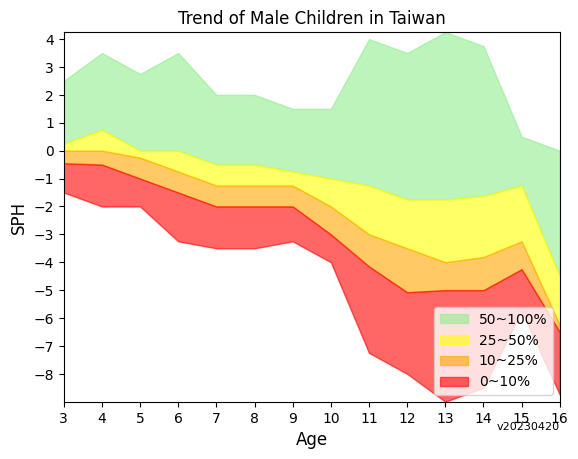

In [31]:
plot('男')

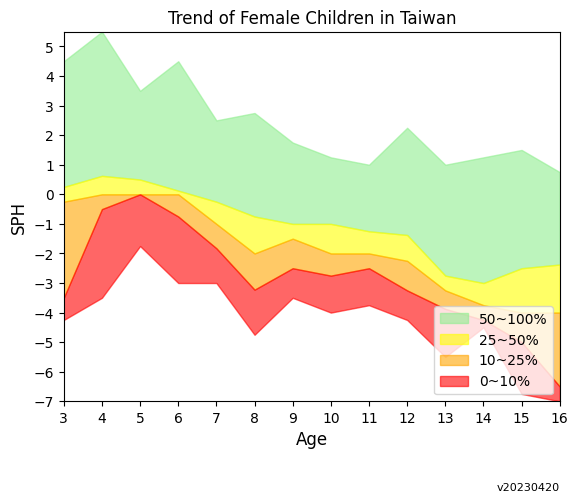

In [32]:
plot('女')

In [33]:
data_to_plot['球面度數'] = [db_version, slope_groupby.copy(), stacked_area.copy()]

# 寫data_to_plot.pkl

In [34]:
import pickle
with open('data_to_plot.pkl', 'wb') as f:
    pickle.dump(data_to_plot, f)
files.download('data_to_plot.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>